# Business Questions
### Q1 : Do the clusters reveal geopolitical voting blocs (e.g., Nordic, Balkan, or ex-USSR countries grouping together)?

### Q2 : Did jury votes (if available) and televotes create separate clusters, indicating a split between professional and public preferences ?

### Q3: Check if countries in the same cluster belong to similar regions (e.g., Scandinavian countries, Balkan countries).

# Loading Data

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/2a1f3ab7bcc76eef1b8e1eb29afbd54c4ebf86f2/eurovision-2016.csv')

# Understanding the Data

In [3]:
df.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [4]:
df.shape

(1066, 11)

In [5]:
df.describe()

,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,420.000000,420.000000
mean,13.195122,13.195122,13.195122,13.195122,13.195122,13.195122,13.195122,5.800000,5.800000
std,7.332698,7.332698,7.332698,7.332698,7.332698,7.332698,7.332698,3.344643,3.344643
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,3.000000,3.000000
50%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,5.500000,5.500000
75%,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,8.000000,8.000000
max,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,12.000000,12.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From country     1066 non-null   object 
 1   To country       1066 non-null   object 
 2   Jury A           1066 non-null   int64  
 3   Jury B           1066 non-null   int64  
 4   Jury C           1066 non-null   int64  
 5   Jury D           1066 non-null   int64  
 6   Jury E           1066 non-null   int64  
 7   Jury Rank        1066 non-null   int64  
 8   Televote Rank    1066 non-null   int64  
 9   Jury Points      420 non-null    float64
 10  Televote Points  420 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 91.7+ KB


# checking on the quality of the data


In [7]:
df.isna().sum()

,0
From country,0
To country,0
Jury A,0
Jury B,0
Jury C,0
Jury D,0
Jury E,0
Jury Rank,0
Televote Rank,0
Jury Points,646


In [8]:
df.drop(['Jury Points','Televote Points'],axis=1,inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['total_votes'] = df['Jury A'] + df['Jury B'] + df['Jury C'] + df['Jury D'] + df['Jury E']

In [11]:
edit_df = df.copy()

In [12]:
labelencoder = LabelEncoder()
edit_df['From country'] = labelencoder.fit_transform(edit_df['From country'])
edit_df['To country'] = labelencoder.fit_transform(edit_df['To country'])

In [13]:
edit_df

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,total_votes
0,0,4,20,16,24,22,24,25,14,106
1,0,8,21,15,25,23,16,22,22,100
2,0,23,22,14,23,24,21,24,24,104
3,0,3,19,12,11,21,11,13,19,74
4,0,12,8,13,9,14,9,10,10,53
...,...,...,...,...,...,...,...,...,...,...
1061,41,24,11,1,1,1,5,2,6,19
1062,41,17,18,13,8,17,4,12,15,60
1063,41,10,2,2,3,2,1,1,19,10
1064,41,2,23,15,12,18,13,17,13,81


In [14]:
scaler = MaxAbsScaler()
scaled_df  = scaler.fit_transform(edit_df)

pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)

In [15]:
pca_df

array([[ 0.87540818, -0.07388251],
       [ 0.7822193 ,  0.05271748],
       [ 0.8995517 ,  0.59129318],
       ...,
       [-1.09627725, -0.31536535],
       [ 0.31095316, -0.61909194],
       [ 0.47680865, -0.65603385]])

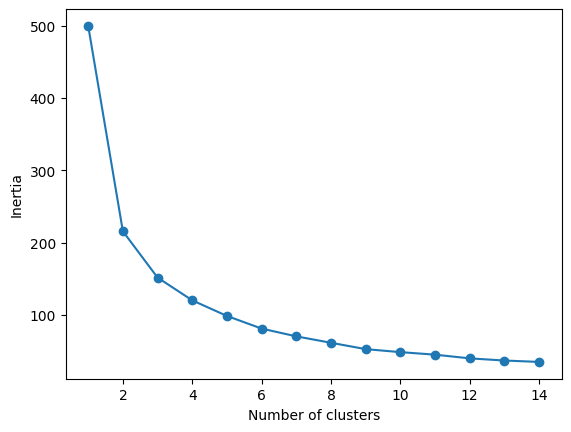

In [17]:
inertia_range = []
ks = range(1,15)
for k in ks:

  model = KMeans(n_clusters=k ,random_state=42)

  model.fit(pca_df)
  # as long an inertia is lower that was better
  # print(model.inertia_)
  inertia_range.append(model.inertia_)

plt.plot(ks,inertia_range,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

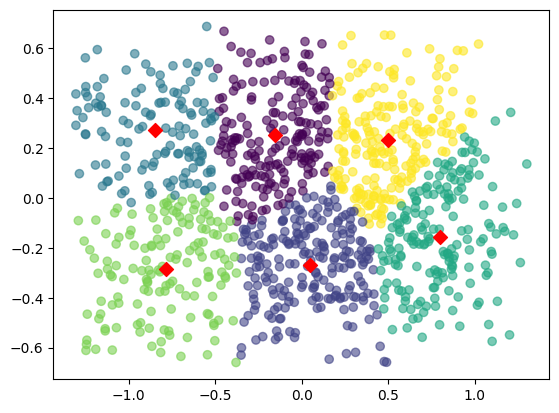

In [18]:
model = KMeans(n_clusters=6,random_state=42)

model.fit(pca_df)

labels = model.fit_predict(pca_df)
x = pca_df[:,0]
y = pca_df[:,1]

plt.scatter(x,y,c=labels,alpha=0.6)
centroied = model.cluster_centers_
plt.scatter(centroied[:,0],centroied[:,1],marker='D',s=50,color='red')
plt.show()


In [19]:
df['clusters'] = labels
df['clusters'].value_counts()

,count
clusters,
1,217
5,202
0,190
3,180
4,150
2,127


In [20]:
def defining_clusters(cluster_num):
  return df[df['clusters'] == cluster_num]

cluster_0 = defining_clusters(0)
cluster_1 = defining_clusters(1)
cluster_2 = defining_clusters(2)
cluster_3 = defining_clusters(3)
cluster_4 = defining_clusters(4)
cluster_5 = defining_clusters(5)

In [21]:
data = df.loc[:,['Televote Rank','Jury Rank','total_votes','clusters']]
data

,Televote Rank,Jury Rank,total_votes,clusters
0,14,25,106,3
1,22,22,100,3
2,24,24,104,5
3,19,13,74,1
4,10,10,53,0
...,...,...,...,...
1061,6,2,19,2
1062,15,12,60,1
1063,19,1,10,4
1064,13,17,81,1


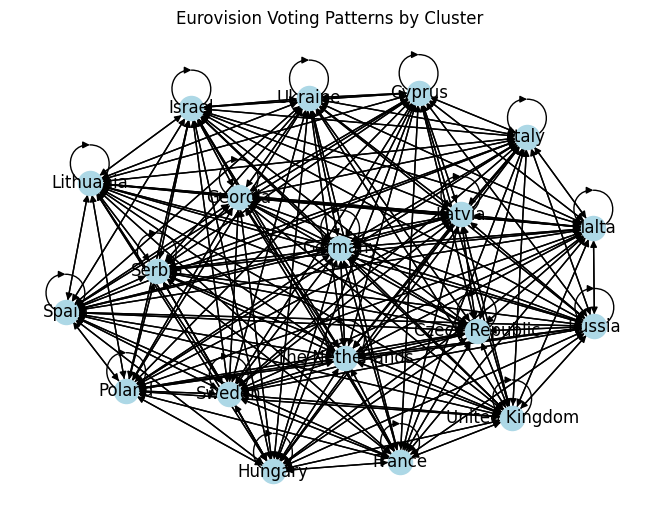

In [22]:
cluster_0 = defining_clusters(0)
def voting_for_eachother(cluster):
  return [(clus,to_country) for clus in cluster['From country'].unique() for to_country in cluster['To country'].unique() if clus in cluster['To country'].unique()]

votes = voting_for_eachother(cluster_0)

G = nx.DiGraph()
G.add_edges_from(votes)

nx.draw(G, with_labels=True, node_color='lightblue')
plt.title("Eurovision Voting Patterns by Cluster")
plt.show()

In [23]:
# countries of North Europe
def conected_contries(cluster,region):
  return cluster[(cluster['To country'].isin(region)) & (cluster['From country'].isin(region))]

Nordic_regions = ['Denmark','Finland','Iceland','Norway','Sweden']
df_Nordic = pd.concat([conected_contries(cluster_1,Nordic_regions),conected_contries(cluster_2,Nordic_regions),conected_contries(cluster_0,Nordic_regions)],axis=0)
df_Nordic

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,total_votes,clusters
389,Finland,Sweden,2,1,3,1,6,1,2,13,2
541,Iceland,Sweden,1,4,19,4,17,5,1,45,2
311,Denmark,Sweden,5,20,17,10,2,7,1,54,0
770,Norway,Sweden,13,6,11,12,14,12,4,56,0


In [24]:
fig = px.choropleth(
    df_Nordic,
    locations='From country',
    locationmode='country names',
    color='To country',
    color_continuous_scale='Inferno',
    title=f'From Country and To Country that votes')
fig.show()

In [25]:
ex_USSR_region = ["Armenia","Azerbaijan","Belarus","Estonia","Georgia","Kazakhstan","Kyrgyzstan","Russia","Tajikistan","Turkmenistan","Ukraine","Uzbekistan"]
ex_USSR_region_cluster_0 = conected_contries(cluster_5,ex_USSR_region)
df_ex_USSR = pd.concat([conected_contries(cluster_0,ex_USSR_region),conected_contries(cluster_1,ex_USSR_region),conected_contries(cluster_2,ex_USSR_region),conected_contries(cluster_3,ex_USSR_region),conected_contries(cluster_4,ex_USSR_region),conected_contries(cluster_5,ex_USSR_region)],axis=0)
df_ex_USSR

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,total_votes,clusters
43,Armenia,Russia,5,17,7,7,16,9,1,52,0
129,Belarus,Azerbaijan,13,12,12,11,8,9,3,56,1
351,Estonia,Georgia,23,26,22,2,3,15,15,76,1
354,Estonia,Armenia,15,12,14,11,8,12,16,60,1
435,Georgia,Azerbaijan,16,20,12,19,20,21,4,87,1
456,Georgia,Armenia,13,6,15,18,22,16,1,74,1
1040,Ukraine,Armenia,13,20,7,21,17,15,4,78,1
48,Armenia,Georgia,2,2,2,2,2,2,3,10,2
117,Azerbaijan,Russia,1,1,1,1,1,1,1,5,2
120,Azerbaijan,Ukraine,2,3,2,2,2,2,2,11,2


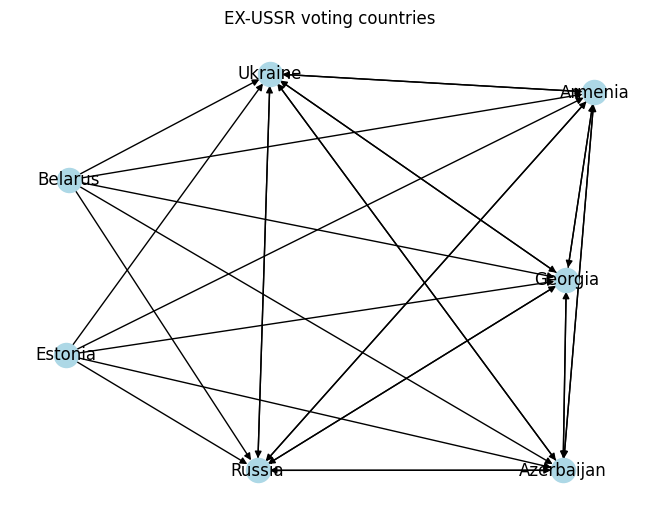

In [26]:
from_and_to_USSR = list(zip(df_ex_USSR['From country'].values,df_ex_USSR['To country'].values))
from_and_to_USSR
G = nx.DiGraph()
G.add_edges_from(from_and_to_USSR)

nx.draw(G,with_labels=True,node_color='lightblue')
plt.title("EX-USSR voting countries")
plt.show()

In [135]:
Balkan_region = ['Albania','Bosnia and Herzegovina','Bulgaria','Greece','Kosovo','Montenegro','Macedonia','Turkey','Romanian','Serbia','Croatia','Hungary','Italy','Slovenia']
df_Balkan =pd.concat([conected_contries(cluster_0,Balkan_region),conected_contries(cluster_1,Balkan_region),conected_contries(cluster_2,Balkan_region),conected_contries(cluster_3,Balkan_region),conected_contries(cluster_4,Balkan_region),conected_contries(cluster_5,Balkan_region)],axis=0)
df_Balkan

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,total_votes,clusters
4,Albania,Hungary,8,13,9,14,9,10,10,53,0
233,Croatia,Italy,5,3,5,17,16,8,11,46,0
242,Croatia,Serbia,12,11,4,7,14,9,1,48,0
486,Greece,Hungary,11,4,14,13,8,8,9,50,0
218,Bulgaria,Croatia,19,18,17,16,6,15,25,76,1
487,Greece,Italy,12,14,22,24,3,15,11,75,1
489,Greece,Bulgaria,13,8,9,14,13,11,4,57,1
523,Hungary,Croatia,17,7,12,14,24,18,21,74,1
616,Italy,Bulgaria,9,15,17,18,15,14,4,74,1
625,Italy,Croatia,8,13,21,12,25,17,22,79,1


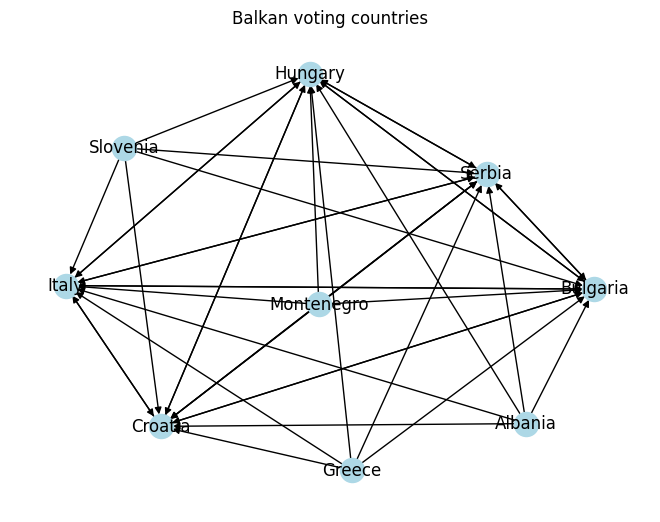

In [28]:
G = nx.DiGraph()
G.add_edges_from(list(zip(df_Balkan['From country'].values,df_Balkan['To country'].values)))

nx.draw(G,with_labels=True,node_color='lightBlue')
plt.title("Balkan voting countries")
plt.show()

### Q1 : Do the clusters reveal geopolitical voting blocs (e.g., Nordic, Balkan, or ex-USSR countries grouping together)?

#### Answer : based on the previous Graphs , it doesn't reveal  Geopolitical voting blocs because some countries doesn't reciving voting from another countries in the same region


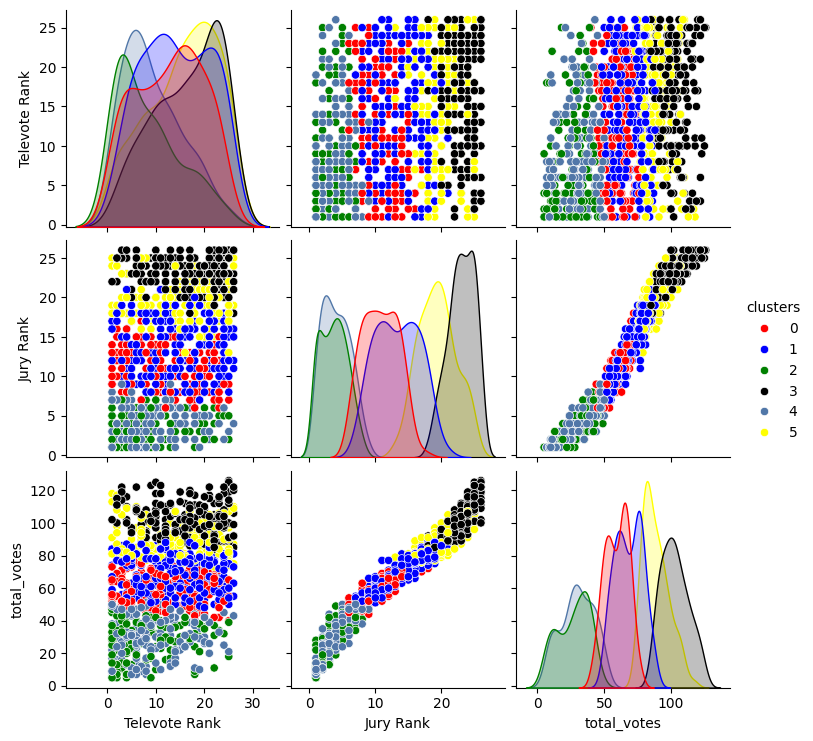

In [ ]:
sns.pairplot(data,hue='clusters',palette={0:'red',1:'blue',2:'green',3:'black',4:'#5177a8',5:'yellow'})
plt.show()

 ### Q2 : Did jury Ranks and televotes create separate clusters, indicating a split between professional and public preferences ?

>> #### based on the Graph Yes Jury Ranks and televotes are factors for creating separate clusters


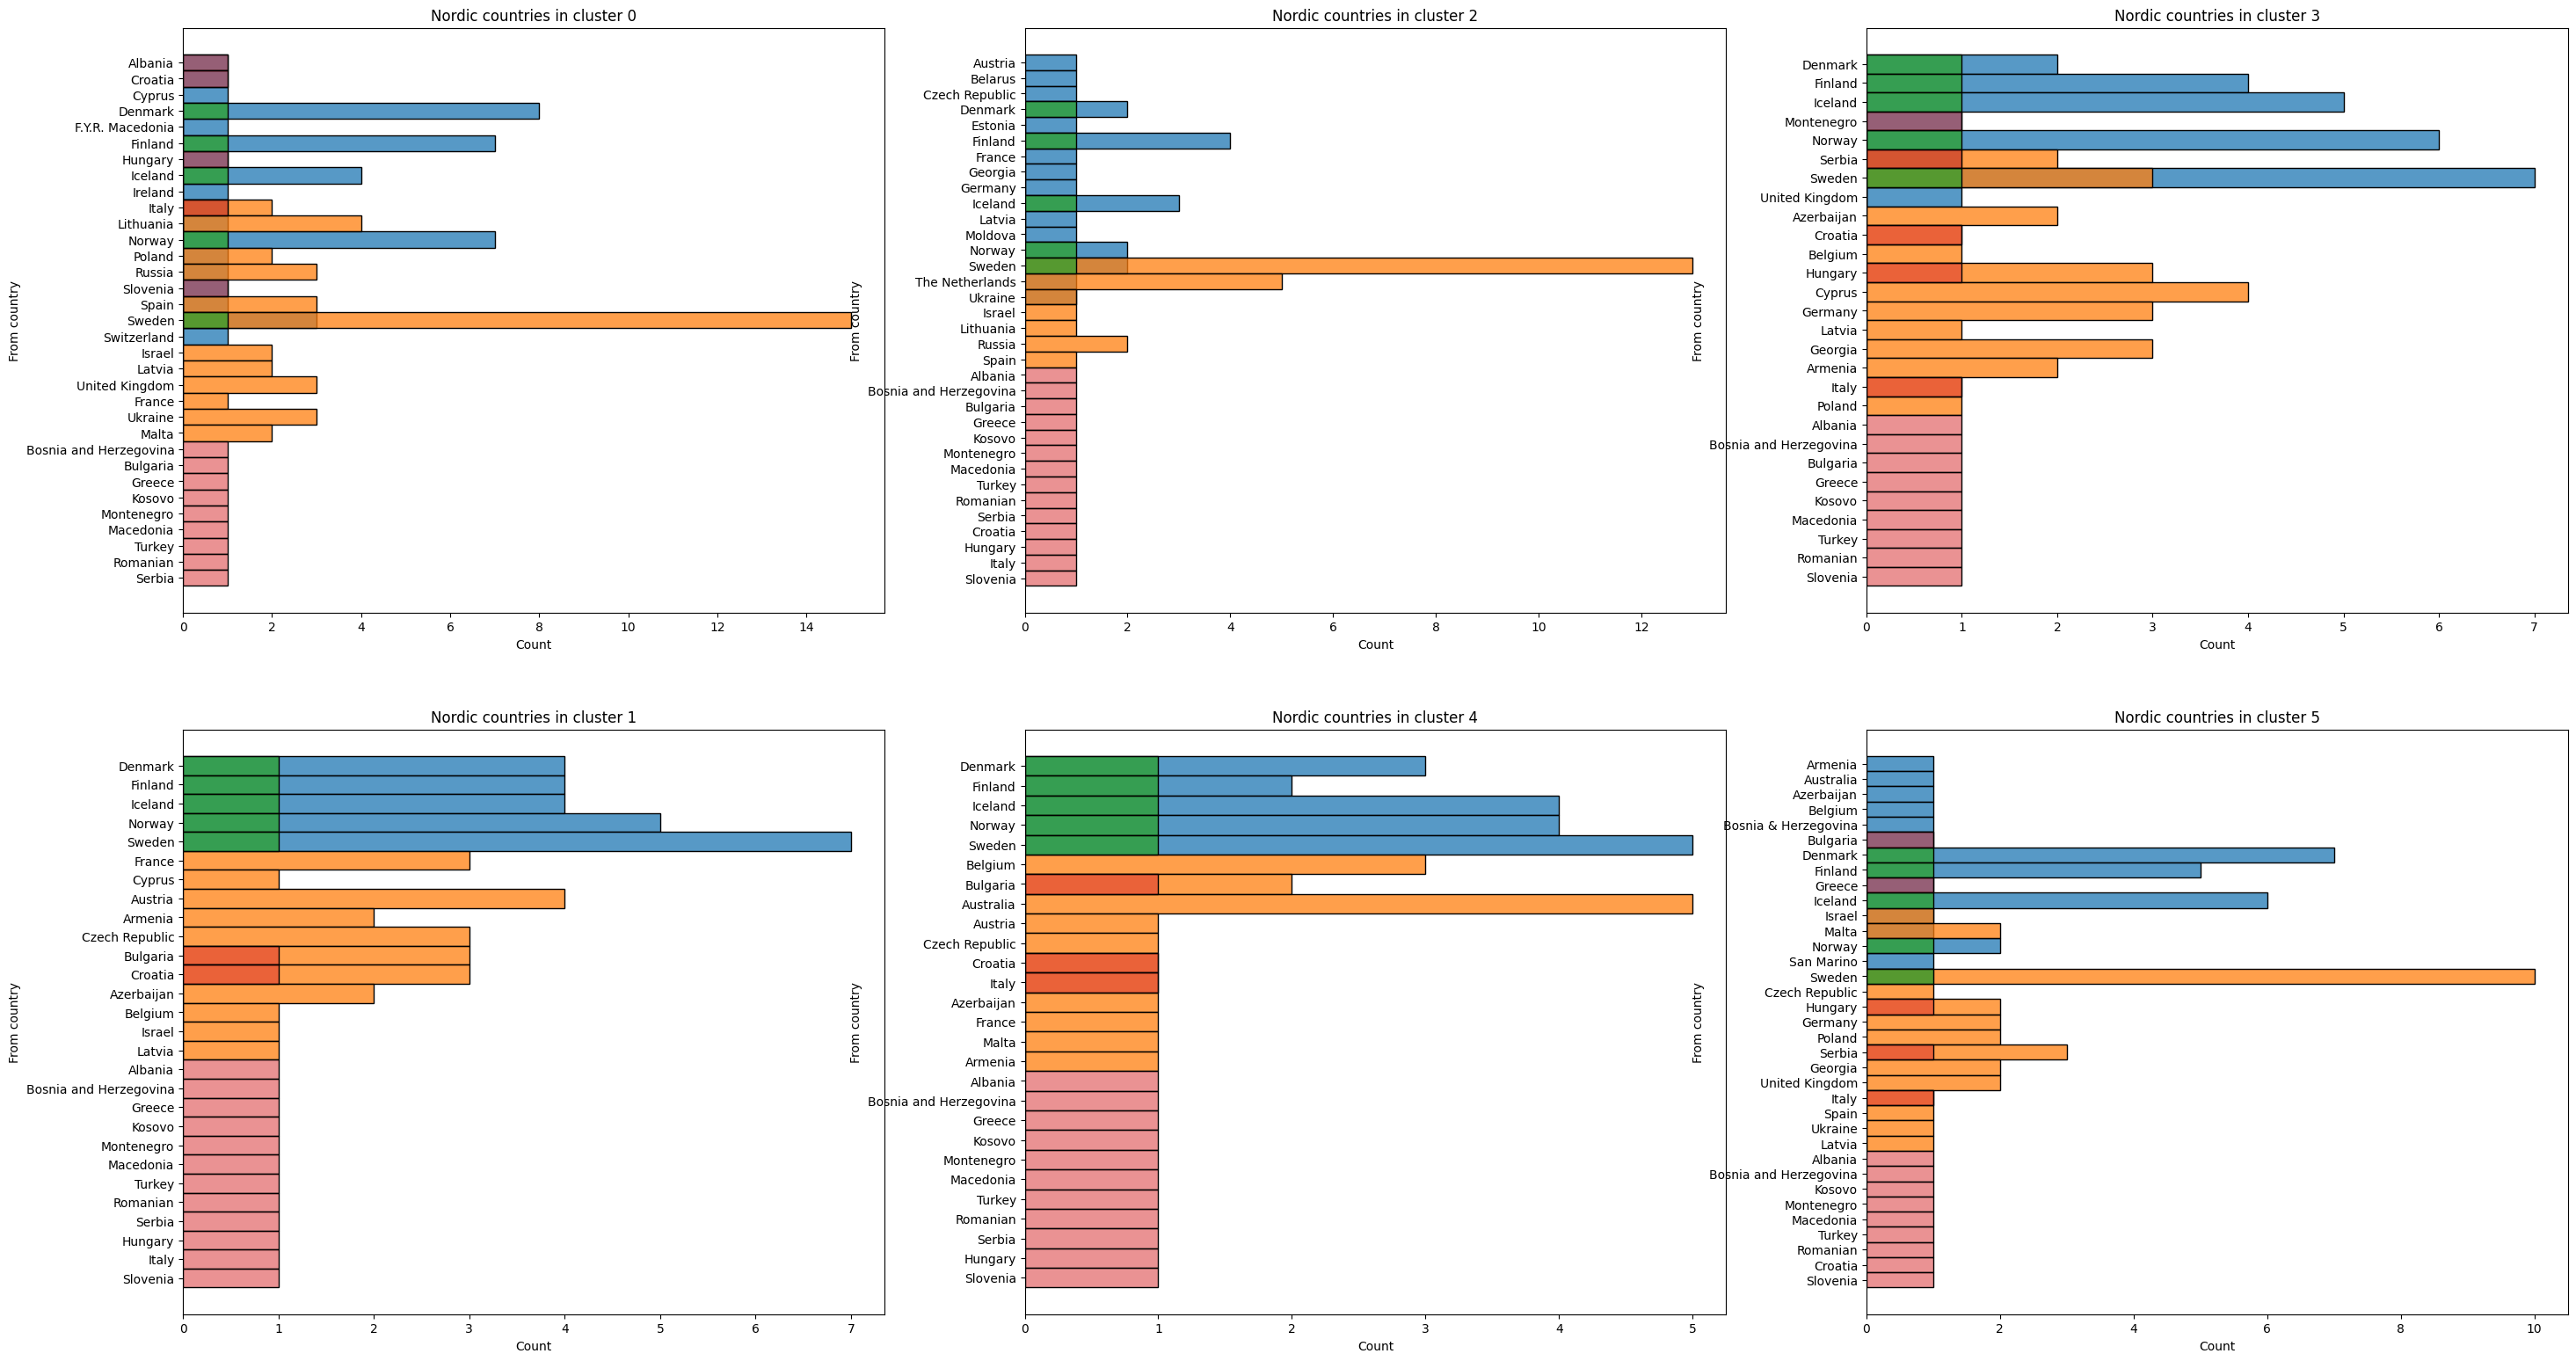

In [142]:
def checking_countries(cluster,region):
  return cluster[(cluster['To country'].isin(region)) | (cluster['From country'].isin(region))]

c0 = checking_countries(cluster_0,Nordic_regions)
c1 = checking_countries(cluster_1,Nordic_regions)
c2 = checking_countries(cluster_2,Nordic_regions)
c3 = checking_countries(cluster_3,Nordic_regions)
c4 = checking_countries(cluster_4,Nordic_regions)
c5 = checking_countries(cluster_5,Nordic_regions)

hue = ["From Country" , "To country" , "Row country"]
fig , ax = plt.subplots(2,3,figsize=(35,19))
sns.histplot(c0,y=c0['From country'],ax=ax[0,0])
sns.histplot(c0,y=c0['To country'],ax=ax[0,0])
sns.histplot(y=Nordic_regions,ax=ax[0,0])
sns.histplot(y=Balkan_region,ax=ax[0,0],alpha=0.5)

ax[0,0].set_title("Nordic countries in cluster 0")

sns.histplot(c1,y=c1['From country'],ax=ax[1,0])
sns.histplot(c1,y=c1['To country'],ax=ax[1,0])
sns.histplot(y=Nordic_regions,ax=ax[1,0])
sns.histplot(y=Balkan_region,ax=ax[1,0],alpha=0.5)
ax[1,0].set_title("Nordic countries in cluster 1")

sns.histplot(c2,y=c2['From country'],ax=ax[0,1])
sns.histplot(c2,y=c2['To country'],ax=ax[0,1])
sns.histplot(y=Nordic_regions,ax=ax[0,1])
sns.histplot(y=Balkan_region,ax=ax[0,1],alpha=0.5)
ax[0,1].set_title("Nordic countries in cluster 2")

sns.histplot(c3,y=c3['From country'],ax=ax[0,2])
sns.histplot(c3,y=c3['To country'],ax=ax[0,2])
sns.histplot(y=Nordic_regions,ax=ax[0,2])
sns.histplot(y=Balkan_region,ax=ax[0,2],alpha=0.5)
ax[0,2].set_title("Nordic countries in cluster 3")


sns.histplot(c4,y=c4['From country'],ax=ax[1,1])
sns.histplot(c4,y=c4['To country'],ax=ax[1,1])
sns.histplot(y=Nordic_regions,ax=ax[1,1])
sns.histplot(y=Balkan_region,ax=ax[1,1],alpha=0.5)
ax[1,1].set_title("Nordic countries in cluster 4")

sns.histplot(c5,y=c5['From country'],ax=ax[1,2])
sns.histplot(c5,y=c5['To country'],ax=ax[1,2])
sns.histplot(y=Nordic_regions,ax=ax[1,2])
sns.histplot(y=Balkan_region,ax=ax[1,2],alpha=0.5)
ax[1,2].set_title("Nordic countries in cluster 5")

plt.show()

#### Q3: Check if countries in the same cluster belong to similar regions (e.g., Scandinavian countries:, Balkan countries).

Anwer: based on the Graph , 50% of balkan countries are not exist in almost all clusters , almost of Nordic countries are exist in all clusters